In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heavyandconstruction/HeavyandConstructioncompanies.csv
/kaggle/input/heavyandconstruction2021/HeavyandConstructioncompanies2021.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

**PCA and Clustering of Heavy and Construction Industry Financial Ratio 2020**

In [3]:
data = pd.read_csv('../input/heavyandconstruction/HeavyandConstructioncompanies.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         22 non-null     object 
 1   P/E Ratio    22 non-null     float64
 2   Price to BV  22 non-null     float64
 3   D/E Ratio    22 non-null     float64
 4   ROA          22 non-null     float64
 5   ROE          22 non-null     float64
 6   NPM          22 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.3+ KB


In [4]:
data.head()

,Code,P/E Ratio,Price to BV,D/E Ratio,ROA,ROE,NPM
0,ACST,-2.23,2.17,2.69,-0.26,-0.97,-1.05
1,ADHI,236.96,0.87,5.72,0.26,1.00,0.88
2,BUKK,5.29,0.78,0.75,0.08,0.15,0.14
3,DGIK,-7.63,0.43,0.73,-0.03,-0.06,-0.11
4,IDPR,-2.16,0.59,0.69,-0.16,-0.27,-0.55


In [5]:
X = data.iloc[:, 1:6].values
y = data.iloc[:, 0].values

In [6]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [7]:
X

array([[-4.62636246e-01, -1.71435217e-02,  7.77682963e-01,
        -2.79518884e+00, -3.12473178e+00],
       [ 1.92912215e+00, -3.21680615e-01,  3.05337859e+00,
         2.71808018e+00,  3.18294756e+00],
       [-3.87440698e-01, -3.42763952e-01, -6.79363080e-01,
         8.09640905e-01,  4.61360025e-01],
       [-5.16633049e-01, -4.24754708e-01, -6.94384173e-01,
        -3.56627541e-01, -2.11032188e-01],
       [-4.61936287e-01, -3.87273219e-01, -7.24426359e-01,
        -1.73494480e+00, -8.83424402e-01],
       [-1.25718920e+00, -4.99398240e-02, -6.71852533e-01,
        -1.44578733e-01, -8.29574809e-02],
       [-1.20199247e+00, -3.77902847e-01, -9.87295491e-01,
        -1.44578733e-01, -5.09388041e-02],
       [-5.30604949e-02, -1.48328731e-01,  5.44856018e-01,
         6.74700754e-02,  1.09154580e-01],
       [-3.43743285e-01, -3.63847289e-01, -5.29152148e-01,
         3.85543288e-01,  2.05210611e-01],
       [-2.76247281e-01, -2.09236149e-01, -1.05489041e+00,
         7.03616501e-01

In [8]:
pca = PCA(n_components=3)

principal_components = pca.fit_transform(X)

new_X = pd.DataFrame(data = principal_components, columns=['PC1','PC2','PC3'])

In [9]:
new_X.head()

,PC1,PC2,PC3
0,-3.127643,2.875643,-0.184756
1,5.381676,0.084076,-0.869762
2,0.198942,-1.203660,-0.200184
3,-0.876771,-0.460554,-0.286485
4,-1.977152,0.473143,-0.256399


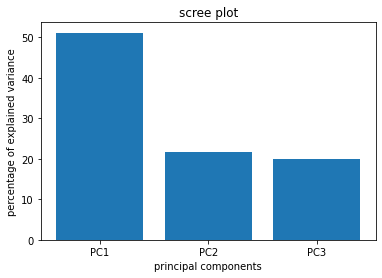

In [10]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals =1)

label = ['PC' + str(x) for x in range (1, len(per_var)+1)]

plt.bar (x=range(1, len(per_var)+1),height=per_var,tick_label=label)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal components')
plt.title('scree plot')
plt.show()

In [11]:
new_X.describe()

,PC1,PC2,PC3
count,2.200000e+01,2.200000e+01,2.200000e+01
mean,1.671643e-17,-1.009294e-17,-5.046468e-18
std,1.635362e+00,1.064937e+00,1.022389e+00
min,-3.127643e+00,-1.287548e+00,-8.697623e-01
25%,-8.683342e-01,-7.617388e-01,-2.907244e-01
50%,1.531494e-02,-2.796492e-01,-2.545892e-01
75%,2.713228e-01,5.700076e-01,-1.431167e-01
max,5.381676e+00,2.875643e+00,4.275520e+00


In [12]:
display(new_X)

,PC1,PC2,PC3
0,-3.127643,2.875643,-0.184756
1,5.381676,0.084076,-0.869762
2,0.198942,-1.203660,-0.200184
3,-0.876771,-0.460554,-0.286485
4,-1.977152,0.473143,-0.256399
5,-1.004699,-0.909407,0.089961
6,-1.117752,-1.125422,-0.175309
7,0.286303,0.203166,-0.243831
8,-0.090082,-0.790781,-0.252780
9,-0.074397,-1.211901,-0.003485


<Figure size 1440x1440 with 0 Axes>

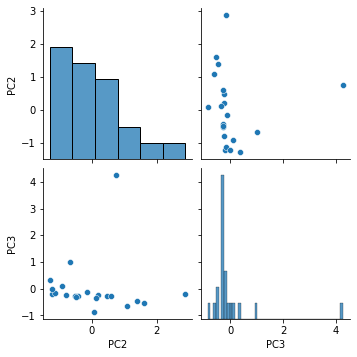

In [13]:
plt.figure(figsize=(20, 20))
sns.pairplot(new_X, vars = new_X.columns[1:6]);

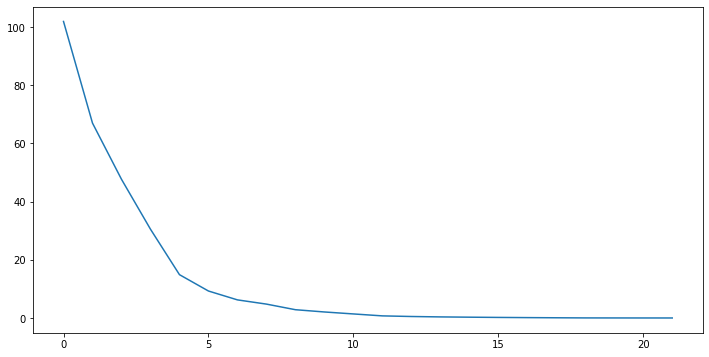

In [14]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 23):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_X.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia)

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=12, random_state=0)
label = kmeans.fit(new_X.values)

In [16]:
new_X['target'] = y
new_X['fit'] = kmeans.labels_

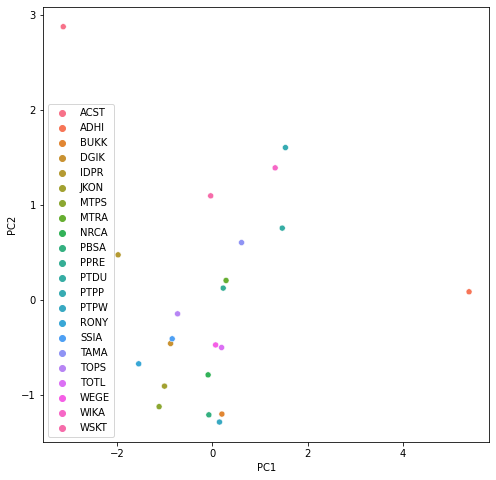

In [17]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='PC1', y='PC2', hue=new_X.target.to_list(), data=new_X);

In [18]:
new_X.head(22)

,PC1,PC2,PC3,target,fit
0,-3.127643,2.875643,-0.184756,ACST,0
1,5.381676,0.084076,-0.869762,ADHI,1
2,0.198942,-1.203660,-0.200184,BUKK,3
3,-0.876771,-0.460554,-0.286485,DGIK,3
4,-1.977152,0.473143,-0.256399,IDPR,0
5,-1.004699,-0.909407,0.089961,JKON,3
6,-1.117752,-1.125422,-0.175309,MTPS,3
7,0.286303,0.203166,-0.243831,MTRA,3
8,-0.090082,-0.790781,-0.252780,NRCA,3
9,-0.074397,-1.211901,-0.003485,PBSA,3


In [19]:
new_X.drop(["target"], axis=1, inplace=True)
new_X.columns = ['fit','PC1 (St.)','PC2 (St.)','PC3 (St.)']
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fit        22 non-null     float64
 1   PC1 (St.)  22 non-null     float64
 2   PC2 (St.)  22 non-null     float64
 3   PC3 (St.)  22 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 744.0 bytes


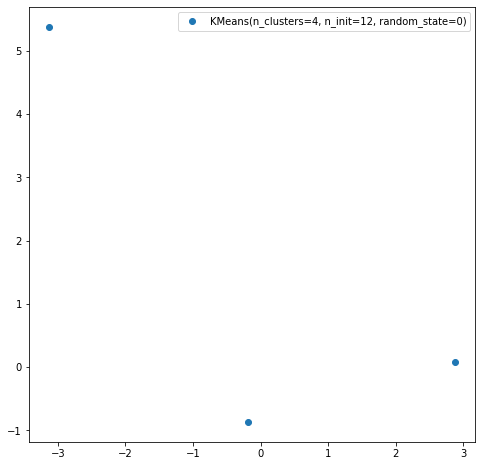

In [20]:
plt.figure(figsize=(8,8))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(principal_components[label == i , 0] , principal_components[label == i , 1] , label = i)
  
plt.legend()
plt.show()

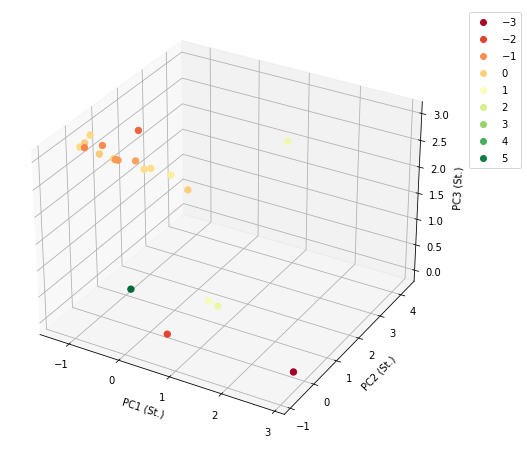

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_X['PC1 (St.)']
y = new_X['PC2 (St.)']
z = new_X['PC3 (St.)']

ax.set_xlabel("PC1 (St.)")
ax.set_ylabel("PC2 (St.)")
ax.set_zlabel("PC3 (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_X['fit'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()